# Project setup

In [2]:
# Lib import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
# Lib config
pd.set_option('display.max_row', 111)
pd.set_option('display.max_column', 111)
sns.set_style("darkgrid")

In [4]:
# Read file
df = pd.read_csv('telecom_customer_churn.csv')

# Dataset exploration

In [ ]:
# Dimensions
df.shape

(7043, 38)

In [ ]:
df.head()

In [ ]:
# Types
df.dtypes

In [ ]:
# Missing values check
df.isna().sum()

- 682 customers don't subscribed home phone service plan 

- 1526 customers don't subscribed to internet service

- 5174 customers didn't churned

In [ ]:
# Duplicate check
df['Customer ID'].duplicated().value_counts()

No duplicates

In [ ]:
# Object rows check
objt = df.select_dtypes("object").drop(['Customer ID', 'City'], axis = 1)
pd.Series(list(map(set,objt.values.T)),index=objt.columns)

Gender                                                       {Male, Female}
Married                                                           {Yes, No}
Offer                     {Offer C, Offer B, Offer A, Offer D, Offer E, ...
Phone Service                                                     {Yes, No}
Multiple Lines                                               {nan, Yes, No}
Internet Service                                                  {Yes, No}
Internet Type                                {nan, Cable, DSL, Fiber Optic}
Online Security                                              {nan, Yes, No}
Online Backup                                                {nan, Yes, No}
Device Protection Plan                                       {nan, Yes, No}
Premium Tech Support                                         {nan, Yes, No}
Streaming TV                                                 {nan, Yes, No}
Streaming Movies                                             {nan, Yes, No}
Streaming Mu

No incoherent data

# Data profiling

In [ ]:
# Descriptive stats
df.describe()

- No outliers

- No incoherent data

<Figure size 432x288 with 0 Axes>

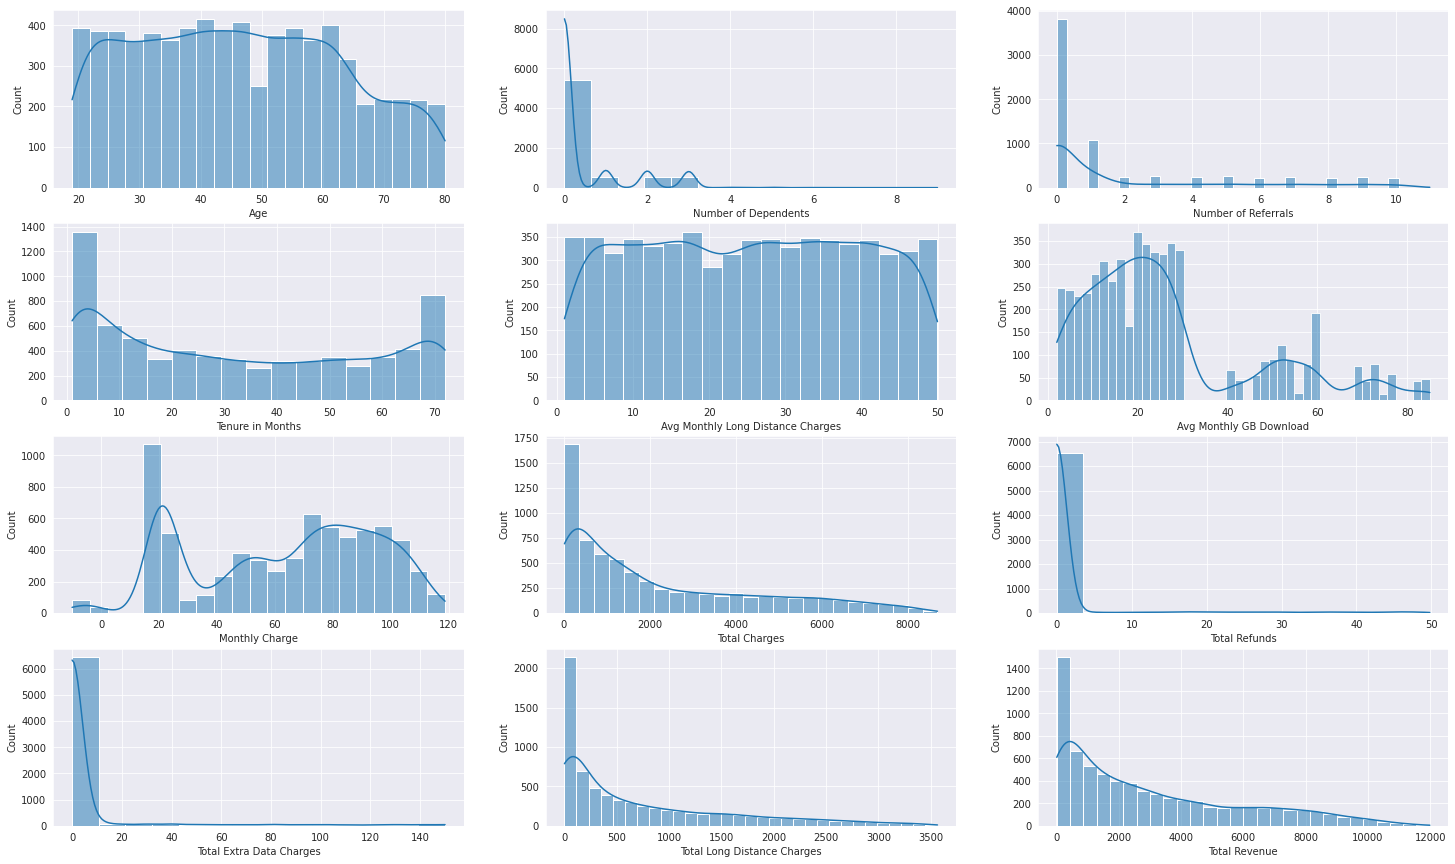

In [276]:
# Distributions of quantitave data
nogeo = df.drop(['Zip Code', 'Latitude', 'Longitude'], axis = 1) # Dropping geography fields

plt.figure()
plt.subplots(4,3, figsize = (25,15))

i = 1
for c in nogeo.select_dtypes(exclude = 'object'):
  plt.subplot(4,3,i)
  sns.histplot(x = nogeo[c],kde = True)
  i += 1

<Figure size 432x288 with 0 Axes>

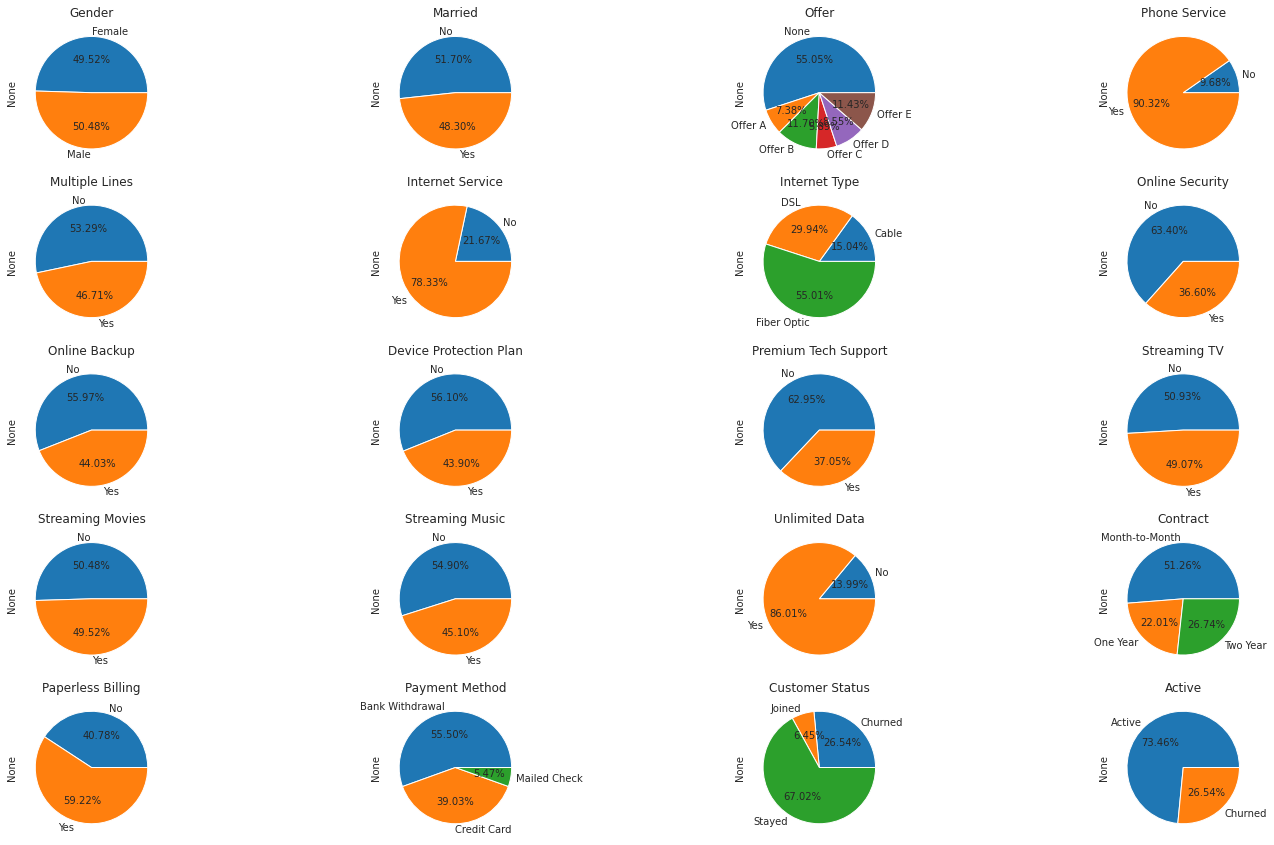

In [287]:
# Qualitative data
qdata = df.drop(['Customer ID', 'City', 'Churn Category', 'Churn Reason'], axis = 1)
plt.figure()
plt.subplots(5,4, figsize = (25,15))

i = 1
for c in qdata.select_dtypes('object'):
  plt.subplot(5,4,i)
  qdata.groupby([c]).size().plot(kind = 'pie', autopct = '%.2f%%')
  plt.title(c)
  i += 1

# Functionnal analysis

## Churn

In [ ]:
# Customer Status
status = pd.Series(df['Customer Status'].unique())
plt.pie(df['Customer Status'].value_counts(), labels = status, autopct = '%1.1f%%')

In [ ]:
# Churn reason
plt.figure(figsize = (10, 7))
sns.countplot(y = df['Churn Reason'], order = df['Churn Reason'].value_counts().index, color = 'grey')

Our competitor are the major threat

Attitude of our employees in support have to be rectified

In [ ]:
# Churn impact on revenue
df.groupby('Customer Status')['Total Revenue'].sum()

In [ ]:
# Churn impact on revenue
(df.groupby('Customer Status')['Total Revenue'].sum() / df['Total Revenue'].sum()) * 100

Churn represent 17% of revenue loss for a total loss of 3 684 459$

In [ ]:
# Creating a new field for active customer
df['Active'] = np.where(df['Customer Status'] == 'Churned', 'Churned', 'Active')

In [ ]:
# Who tend to churn the most ?

plt.figure()
plt.subplots(4,3, figsize = (25,15))
i = 1

for c in nogeo.select_dtypes(exclude = 'object'):
  plt.subplot(4,3,i)
  sns.histplot(x = nogeo[c], hue = df['Active'], palette = ['lightgreen', 'darkred'], kde = True)
  i += 1

plt.savefig("Churn overall stats.png")

**Insights:**
- Newjoiner (Tenure < 5 months) tend to churn the most.
- More churn on the higher Monthly charge
- Total charge and Revenue: Higher churn count for lower amount, Newjoiners spend less because they don't stay much

Do Newcomers have a higher monthly charge ?

In [267]:
df[['Monthly Charge','Tenure in Months']].corr()

,Monthly Charge,Tenure in Months
Monthly Charge,1.000000,0.239065
Tenure in Months,0.239065,1.000000


Monthly charge and tenure are not correlated

<Figure size 432x288 with 0 Axes>

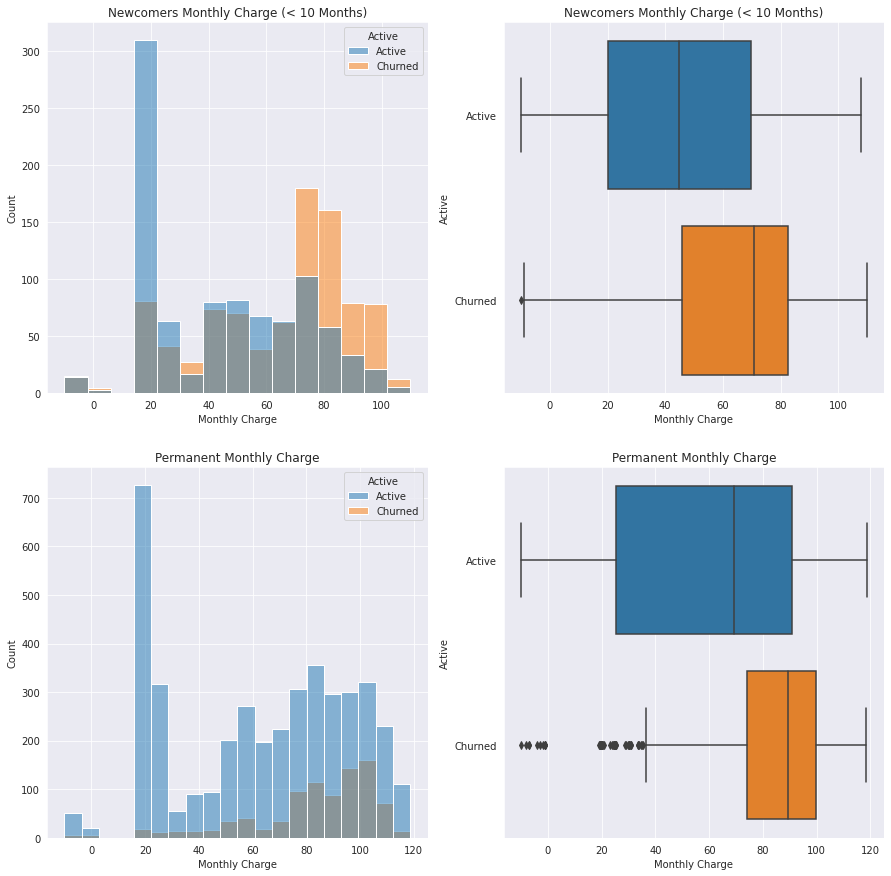

In [274]:
# Newcomers vs Permanent
New = df.loc[df['Tenure in Months'] < 10]
Perm = df.loc[df['Tenure in Months'] > 10]

plt.figure()
plt.subplots(2,2,figsize = (15,15))

plt.subplot(2,2,1)
sns.histplot(x = New['Monthly Charge'], hue = New['Active'])
plt.title('Newcomers Monthly Charge (< 10 Months)')

plt.subplot(2,2,2)
sns.boxplot(x = New['Monthly Charge'], y = New['Active'])
plt.title('Newcomers Monthly Charge (< 10 Months)')

plt.subplot(2,2,3)
sns.histplot(x = Perm['Monthly Charge'], hue = df['Active'])
plt.title('Permanent Monthly Charge')

plt.subplot(2,2,4)
sns.boxplot(x = Perm['Monthly Charge'], y = df['Active'])
plt.title('Permanent Monthly Charge')

plt.show()

Same distribution between the 2 customers profiles.
On higher charges, there is more churner among newcomers 

## Socio-demographic

In [5]:
df.head(2)

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,9,None,Yes,42.39,No,Yes,Cable,16.0,No,Yes,No,Yes,Yes,No,No,Yes,One Year,Yes,Credit Card,65.6,593.3,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,9,None,Yes,10.69,Yes,Yes,Cable,10.0,No,No,No,No,No,Yes,Yes,No,Month-to-Month,No,Credit Card,-4.0,542.4,38.33,10,96.21,610.28,Stayed,NaN,NaN


([<matplotlib.patches.Wedge at 0x7fb86c9511c0>,
 [Text(-0.016436707732256382, 1.0998771907076375, 'Female'),
  Text(0.016436707732256247, -1.0998771907076375, 'Male')],
 [Text(-0.008965476944867117, 0.5999330131132566, '50.5%'),
  Text(0.008965476944867044, -0.5999330131132566, '49.5%')])

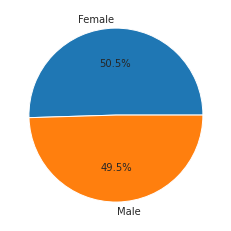

In [55]:
# Gender pct
gender = pd.Series(df['Gender'].unique())
plt.pie(df['Gender'].value_counts(), labels = gender, autopct = '%1.1f%%')

([<matplotlib.patches.Wedge at 0x7fb86c827400>,
 [Text(-0.05860659335486817, 1.0984376483056912, 'Yes'),
  Text(0.05860649051171347, -1.0984376537928315, 'No')],
 [Text(-0.031967232739019, 0.5991478081667406, '51.7%'),
  Text(0.031967176642752795, -0.5991478111597263, '48.3%')])

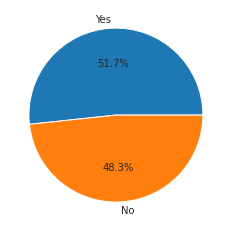

In [57]:
# Married pct
married = pd.Series(df['Married'].unique())
plt.pie(df['Married'].value_counts(), labels = married, autopct = '%1.1f%%')

<Axes: xlabel='Number of Dependents', ylabel='count'>

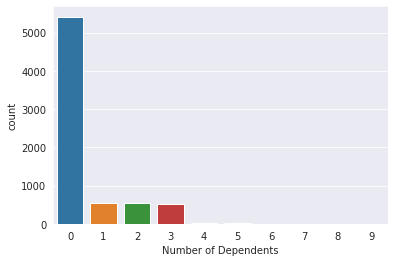

In [60]:
# House composition
sns.countplot(x= 'Number of Dependents', data = df, )

In [61]:
df.pivot_table(index = ['Gender', 'Married'], values=['Age'] , aggfunc= 'mean')

Age  Number of Dependents
Gender Married                                 
Female No       47.308889              0.138889
       Yes      45.581161              0.808649
Male   No       45.845736              0.194460
       Yes      47.298133              0.774796

## Financial 💰

In [63]:
# Total revenue
df['Total Revenue'].sum()

21371131.69

In [93]:
# Revenue generated by contracts
df.groupby('Contract').agg({'Total Revenue': ['mean', 'sum', 'count']})

Total Revenue                  
                        mean         sum count
Contract                                      
Month-to-Month   1707.060449  6162488.22  3610
One Year         3981.802781  6171794.31  1550
Two Year         4799.176399  9036849.16  1883

## Habits

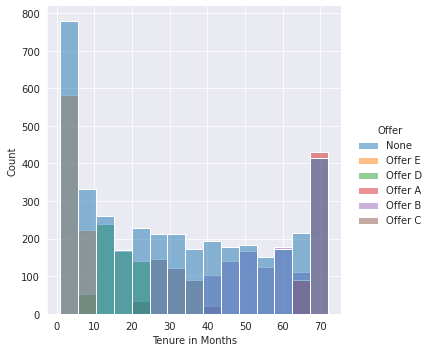

In [ ]:
sns.displot(x='Tenure in Months', data = df, hue = 'Offer')

In [ ]:
# Churn reason
df.groupby('Churn Category')['Churn Category'].count()

Churn Category
Attitude           314
Competitor         841
Dissatisfaction    321
Other              182
Price              211
Name: Churn Category, dtype: int64

In [ ]:
# Churn because of attitude
df.loc[(df['Churn Category'] == 'Attitude'), ['Churn Category', 'Churn Reason']] \
  .groupby('Churn Reason') \
  .count()

,Churn Category
Churn Reason,
Attitude of service provider,94
Attitude of support person,220


## Geographic

In [41]:
# How many customers in cities
df.groupby('City').size()

City
Acampo          4
Acton           4
Adelanto        5
Adin            4
Agoura Hills    5
               ..
Yreka           4
Yuba City       8
Yucaipa         4
Yucca Valley    5
Zenia           4
Length: 1106, dtype: int64

In [ ]:
map = px.scatter_geo(df, lat='Latitude', lon = 'Longitude', fitbounds="locations",size='Total Revenue', width= 750, height=400)
map.update_layout(margin={"r":0,"t":20,"l":0,"b":0},title = 'Customer Locations', title_x=0.5, title_y = 0.98)
map.show()